In [25]:
from cia.ev.metrics.metrics_controller import compute_metrics
from cia.ev.metrics.musicannotation import MusicAnnotation
import os

In [26]:
base_path = "/home/lennon/workspace/audio-seg-data-synth/Cortes_music_nmusic"
reference_labels = os.path.join(base_path,"139850","139850_corte_m_nm.txt")
hypothesis_labels = os.path.join(base_path,"139850", "139850-local.txt")

## Reference

### Original

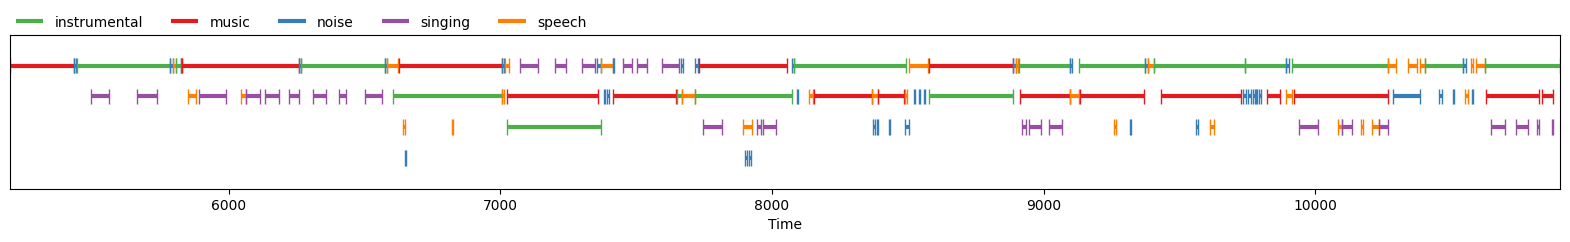

In [27]:
MusicAnnotation.from_txt(reference_labels)

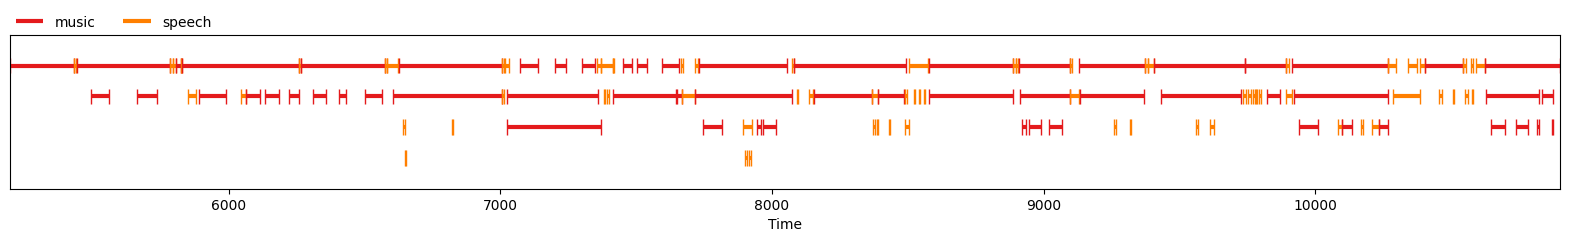

In [28]:
reference = MusicAnnotation.from_txt(
    reference_labels,
    map_labels=lambda x: (
        "music" if x in ["singing", "instrumental", "music"] else "speech"
    ),
)
reference

### Segmented

In [29]:
# reference = segmentation(reference)
# reference

In [30]:
reference.save(os.path.join(base_path, "139850", "139850-reference_processed.txt"))

## Hyphotesis

In [31]:
start = reference.get_timeline()[0].start
end = reference.get_timeline()[-1].end

### Original

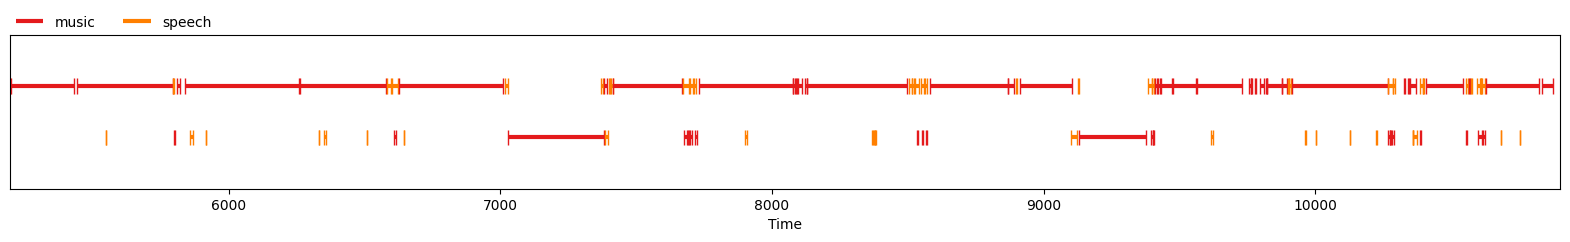

In [32]:
hypothesis = MusicAnnotation.from_txt(
    hypothesis_labels,
    start=start,
    end=end
)
hypothesis

### Support

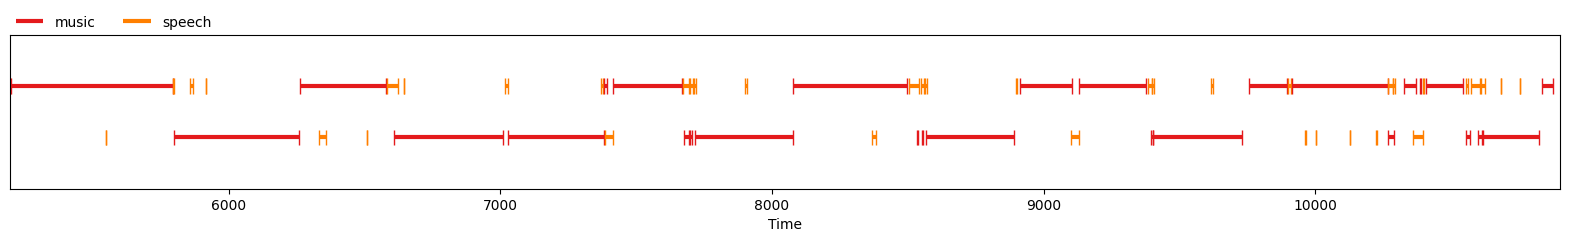

In [33]:
hypothesis = hypothesis.seq_support(collar=30)
hypothesis

### Segmentation

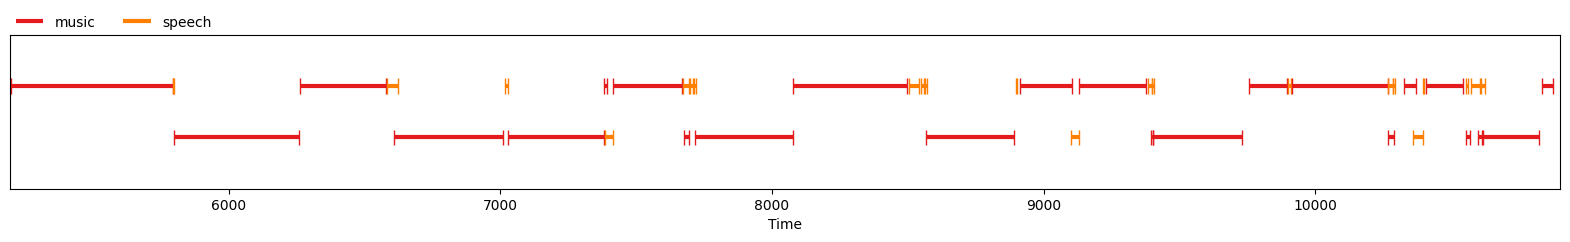

In [34]:
hypothesis = hypothesis.segmentation()
hypothesis

In [35]:
hypothesis.save(os.path.join(base_path, "139850", "139850-hyphotesis-processed.txt"))

## Analysis

In [36]:
error_analysis = compute_metrics(
    marks_dict=None,
    Ref=reference,
    Hyp=hypothesis,
    withcontext=False,
    tolerance=0.0,
    validLabels=["music"],
    endfile=None,
)
error_analysis

{'counts': {'missed detection': 43,
  'false alarm': 8,
  'correct tp': 97,
  'correct dap': 87,
  'total': 130,
  'total hyp': 47,
  'confusion': 12,
  'total musics audit': 130},
 'dap': 0.6692307692307692,
 'errors': {'pyannote': 'Annotation',
  'content': [{'segment': {'start': 5195.0, 'end': 5195.64172},
    'track': 'confusion0',
    'label': ('confusion', '-', 'speech')},
   {'segment': {'start': 5195.0, 'end': 5195.64172},
    'track': 'false alarm0',
    'label': ('false alarm', '-', 'speech')},
   {'segment': {'start': 5197.25805, 'end': 5794.54059},
    'track': 'correct dap0',
    'label': ('correct dap', 'music', 'music')},
   {'segment': {'start': 5197.25805, 'end': 5794.54059},
    'track': 'correct dap1',
    'label': ('correct dap', 'music', 'music')},
   {'segment': {'start': 5197.25805, 'end': 5794.54059},
    'track': 'correct dap2',
    'label': ('correct dap', 'music', 'music')},
   {'segment': {'start': 5197.25805, 'end': 5794.54059},
    'track': 'correct dap3',